# House Price Prediction

Let's start by importing requisite modules.

In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline
sns.set()

Let us first import data we had to Notebook.

In [252]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
#train = train[train.LotArea < 100000]

Let us analyse the data and get an understanding of how the data is distributed.

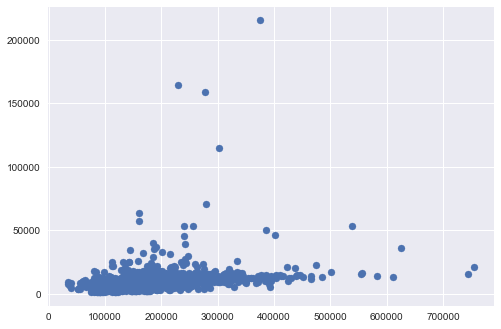

In [253]:
plt.scatter(train.SalePrice,train.LotArea)

In [254]:
test.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal


Merging both data sets so it will easier for us to work on.

In [255]:
merged_data = train.iloc[:,:-1].append(test,ignore_index = True)

Checking what percent of data is not available. If half of the data is not available it doesn't makes sense to use it.Let us find them.

In [256]:
for i in merged_data.columns:
    if ((merged_data[i].isnull().value_counts()/len(merged_data[i]))[0]) < 0.5:
        print (i,((merged_data[i].notnull().value_counts()/len(merged_data[i]))[0])*100)

Alley 93.2168550874
PoolQC 99.6574169236
Fence 80.4385063378
MiscFeature 96.4028776978


Let us have a look at the above columns to ascertain if it is useful any way

In [257]:
merged_data[['Alley','PoolQC','Fence','MiscFeature']]

# Checking for any None values.
# So we can drop these columns

merged_data.drop(['Alley','PoolQC','Fence','MiscFeature'],axis = 1,inplace = True)

We are now trying to fill the missing values as the label encoder doesn't work if there are many missing values.

Missing value Identification and filling is done by the following process.

- Counting values using value_counts()
- Chosing which value to be filled. For example, If there are only few missing points, then we can fill missing values using mode of that particular column.

In [258]:
merged_data.MSZoning.value_counts()

# As the mode of the data is 'RL' we can safely assume that probablity of missing MSZoning data 
# being'RL' is more.

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [259]:
np.where(merged_data.MSZoning.isnull())
merged_data.MSZoning.iloc[1915]

nan

In [260]:
merged_data['MSZoning'] = merged_data.MSZoning.fillna(merged_data.MSZoning.mode()[0])

In [261]:
merged_data.MSZoning.mode()[0]
merged_data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
2914,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,6,2006,WD,Normal
2915,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,24,0,0,0,0,0,4,2006,WD,Abnorml
2916,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,9,2006,WD,Abnorml
2917,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,32,0,0,0,0,700,7,2006,WD,Normal
2918,2919,60,RL,74.0,9627,Pave,Reg,Lvl,AllPub,Inside,...,48,0,0,0,0,0,11,2006,WD,Normal


Knowing which data columns has missing values

In [262]:
for i in range(0,len(merged_data.columns)):
    if merged_data.iloc[:,i].notnull().value_counts()[1] != 2919 :
        print(merged_data.iloc[:,i].name,merged_data.iloc[:,i].notnull().value_counts()[1])

LotFrontage 2433
Utilities 2917
Exterior1st 2918
Exterior2nd 2918
MasVnrType 2895
MasVnrArea 2896
BsmtQual 2838
BsmtCond 2837
BsmtExposure 2837
BsmtFinType1 2840
BsmtFinSF1 2918
BsmtFinType2 2839
BsmtFinSF2 2918
BsmtUnfSF 2918
TotalBsmtSF 2918
Electrical 2918
BsmtFullBath 2917
BsmtHalfBath 2917
KitchenQual 2918
Functional 2917
FireplaceQu 1499
GarageType 2762
GarageYrBlt 2760
GarageFinish 2760
GarageCars 2918
GarageArea 2918
GarageQual 2760
GarageCond 2760
SaleType 2918


LotFrontage area is filled using its mean value.

In [ ]:
merged_data.LotFrontage.fillna(merged_data.LotFrontage.mean(),inplace = True)

Because all the values are same in the Utilities column it will be of no use.

In [264]:
merged_data.drop(['Utilities'],axis = 1,inplace = True)

Assuming that no data on exterior covering means that there is no exterior cover

In [265]:
merged_data['Exterior2nd'].fillna('NT',inplace = True)
merged_data['Exterior1st'].fillna('NT',inplace = True)
merged_data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
2914,2915,160,RM,21.0,1936,Pave,Reg,Lvl,Inside,Gtl,...,0,0,0,0,0,0,6,2006,WD,Normal
2915,2916,160,RM,21.0,1894,Pave,Reg,Lvl,Inside,Gtl,...,24,0,0,0,0,0,4,2006,WD,Abnorml
2916,2917,20,RL,160.0,20000,Pave,Reg,Lvl,Inside,Gtl,...,0,0,0,0,0,0,9,2006,WD,Abnorml
2917,2918,85,RL,62.0,10441,Pave,Reg,Lvl,Inside,Gtl,...,32,0,0,0,0,700,7,2006,WD,Normal
2918,2919,60,RL,74.0,9627,Pave,Reg,Lvl,Inside,Mod,...,48,0,0,0,0,0,11,2006,WD,Normal


In [ ]:
np.where(merged_data.MasVnrType.isnull())

Assuming there is no Masonary veneer area for missing values.

In [ ]:
merged_data['MasVnrArea'].fillna(0,inplace = True)
merged_data['MasVnrType'].fillna('None',inplace = True)
merged_data['MasVnrType'].replace(0,'None',inplace = True)

As he already mentioned NA means no basement so let us assume missing data vaues for basement as no basement homes.

In [ ]:
merged_data[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']]
merged_data['BsmtQual'].fillna('NA',inplace = True)
merged_data['BsmtCond'].fillna('NA',inplace = True)
merged_data['BsmtExposure'].fillna('NA',inplace = True)
merged_data['BsmtFinType1'].fillna('NA',inplace = True)
merged_data['BsmtFinType2'].fillna('NA',inplace = True)
merged_data['BsmtFinSF1'].fillna(0,inplace = True)
merged_data['BsmtFinSF2'].fillna(0,inplace = True)
merged_data['BsmtUnfSF'].fillna(0,inplace = True)
merged_data['TotalBsmtSF'].fillna(0,inplace = True)
merged_data['BsmtFullBath'].fillna(0,inplace = True)
merged_data['BsmtHalfBath'].fillna(0,inplace = True)

So we have now succesfully eliminated missing values in basement segment.Lets move on to garage section.

Let us deal with Garage section also in a similar fashion as we treated basement.

In [ ]:
merged_data['GarageArea'].fillna(0,inplace = True)
merged_data['GarageCars'].fillna(0,inplace = True)
merged_data['GarageCond'].fillna('NA',inplace = True)
merged_data['GarageFinish'].fillna('NA',inplace = True)
merged_data['GarageQual'].fillna('NA',inplace = True)
merged_data['GarageType'].fillna('NA',inplace = True)

This is why random checking helps. We found that there is a value of year which equalled 

In [ ]:
merged_data[merged_data.GarageYrBlt > 2015].GarageYrBlt

We can only assume that the 2207 is a typo for 2007.

In [ ]:
merged_data.GarageYrBlt.replace(2207,2007,inplace = True)

We just can't fill random values for garage year built and cant leave zero this zero could effect linear regression equation. so I thought it would be better if these values are filled by their own built. As t here is high chance of one building their garage when the house is built.

In [ ]:
for i in np.where(merged_data.GarageYrBlt.isnull()):
    merged_data['GarageYrBlt'][i] = merged_data['YearBuilt'][i]
    

Fireplace is not so common so we can assume all the values missing values are places with no fireplace and lets denote them with NA.

In [ ]:
merged_data['FireplaceQu'].fillna('NA',inplace = True)

In [266]:
merged_data['KitchenQual'].fillna('TA',inplace = True)
merged_data['Functional'].fillna('Typ',inplace = True)
merged_data['Electrical'].fillna(merged_data['Electrical'].value_counts().index[0],inplace = True)
merged_data['SaleType'].fillna(merged_data['SaleType'].value_counts().index[0],inplace = True)


merged_data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
2914,2915,160,RM,21.0,1936,Pave,Reg,Lvl,Inside,Gtl,...,0,0,0,0,0,0,6,2006,WD,Normal
2915,2916,160,RM,21.0,1894,Pave,Reg,Lvl,Inside,Gtl,...,24,0,0,0,0,0,4,2006,WD,Abnorml
2916,2917,20,RL,160.0,20000,Pave,Reg,Lvl,Inside,Gtl,...,0,0,0,0,0,0,9,2006,WD,Abnorml
2917,2918,85,RL,62.0,10441,Pave,Reg,Lvl,Inside,Gtl,...,32,0,0,0,0,700,7,2006,WD,Normal
2918,2919,60,RL,74.0,9627,Pave,Reg,Lvl,Inside,Mod,...,48,0,0,0,0,0,11,2006,WD,Normal


In [267]:
merged_data.MasVnrType.value_counts()

None       1766
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

###### Let us split the data again into training and testing sets.

In [268]:
train_ID = merged_data.Id[:1460]
test_ID = merged_data.Id[1460:]
train_set = merged_data.iloc[:1460,1:]
test_set = merged_data.iloc[1460:,1:]
sale_price = train.iloc[:,-1:]
train_set.shape,sale_price.shape,test_set.shape

((1460, 74), (1460, 1), (1459, 74))

###### It is time to apply LABEL ENCODER.

In [269]:
from sklearn.preprocessing import LabelEncoder as LE

In [270]:
merged_data.columns[:40]

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir'],
      dtype='object')

In [271]:
lr = LE()

In [272]:
for i in train_set.columns:
    train_set[i] = lr.fit_transform(train_set[i])
train_set.tail()
for i in test_set.columns[1:]:
    test_set[i] = lr.fit_transform(test_set[i])

###### Splitting into train test split

In [273]:
from sklearn.model_selection import train_test_split as tts

In [274]:
X_train,X_test,y_train,y_test = tts(train_set,sale_price,random_state = 4)

###### Using RandomForest Regressor 

In [275]:
from sklearn.ensemble import RandomForestRegressor as RFR

In [276]:
rf = RFR(random_state=1,)
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

In [277]:
y_pred = rf.predict(X_test)

In [278]:
from sklearn.metrics import mean_squared_error as mse

In [279]:
mse(np.log(y_pred),np.log(y_test))

0.019906515098808676

In [281]:
rf.fit(train_set,sale_price)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

In [282]:
y_predict = rf.predict(test_set)

In [283]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['Saleprice'] = y_predict

In [284]:
sub.to_csv('SubmissionFile.csv',index = False)

** Prediction using Gradient Boosting algorithm **

In [372]:
from sklearn.model_selection import cross_val_score as CVS

In [373]:
from warnings import filterwarnings
filterwarnings('ignore')

In [294]:
from sklearn.ensemble import GradientBoostingRegressor as GBR

In [ ]:
gb = GBR(n_estimators = 3000,loss = 'huber')
CVS(gb,X_train,y_train,cv = 5)

In [376]:
gb.fit(train_set,sale_price)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=3000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [377]:
g = gb.predict(test_set)

In [378]:
pd.DataFrame({'Id':test_ID,'saleprice':g}).to_csv('Submission_gb.csv',index = None)

In [305]:
CVS(gb,train_set,sale_price,cv = 5)